In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
import statsmodels.api as sm
%matplotlib inline

In [2]:
ultimate_df = pd.read_excel( 'ultimate_df.xlsx' )
ultimate_df.head()

,Rk,year,Player,Pos,Age,HT,WT,YOS,Draft Year,Final Pick,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,2000,Tariq Abdul-Wahad,SG,25,1.981103,101.133787,2,1997,11,...,0.756477,101,190,291,98,59,28,106,147,697
1,1,2000,Shareef Abdur-Rahim,SF,23,2.057300,102.040816,3,1996,3,...,0.809437,218,607,825,271,89,87,249,244,1663
2,2,2000,Cory Alexander,PG,26,1.854110,83.900227,4,1995,29,...,0.772727,8,34,42,58,24,2,28,39,82
3,3,2000,Ray Allen,SG,24,1.955705,92.970522,3,1996,5,...,0.886935,83,276,359,308,110,19,183,187,1809
4,4,2000,Rafer Alston,PG,23,1.879508,79.365079,0,1998,39,...,0.750000,5,18,23,70,12,0,29,29,60


In [3]:
ultimate_df.columns

Index(['Rk', 'year', 'Player', 'Pos', 'Age', 'HT', 'WT', 'YOS', 'Draft Year',
       'Final Pick', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [4]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10987 entries, 0 to 10986
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          10987 non-null  int64  
 1   year        10987 non-null  int64  
 2   Player      10987 non-null  object 
 3   Pos         10987 non-null  object 
 4   Age         10987 non-null  int64  
 5   HT          10987 non-null  float64
 6   WT          10987 non-null  float64
 7   YOS         10987 non-null  int64  
 8   Draft Year  10987 non-null  int64  
 9   Final Pick  10987 non-null  int64  
 10  Tm          10987 non-null  object 
 11  G           10987 non-null  int64  
 12  GS          10987 non-null  int64  
 13  MP          10987 non-null  int64  
 14  FG          10987 non-null  int64  
 15  FGA         10987 non-null  int64  
 16  FG%         10987 non-null  float64
 17  3P          10987 non-null  int64  
 18  3PA         10987 non-null  int64  
 19  3P%         10987 non-nul

In [5]:
 X_features = ['Pos', 'HT', 'WT', 'YOS','Draft Year','Final Pick','G','FT%', 'TRB','AST','STL','BLK']
X_df = ultimate_df[X_features]
Y = ultimate_df['3P'] 

In [6]:
X_df =pd.get_dummies(X_df, drop_first=True)
X_df.head()

,HT,WT,YOS,Draft Year,Final Pick,G,FT%,TRB,AST,STL,BLK,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,1.981103,101.133787,2,1997,11,61,0.756477,291,98,59,28,0,0,0,1
1,2.057300,102.040816,3,1996,3,82,0.809437,825,271,89,87,0,0,1,0
2,1.854110,83.900227,4,1995,29,29,0.772727,42,58,24,2,0,1,0,0
3,1.955705,92.970522,3,1996,5,82,0.886935,359,308,110,19,0,0,0,1
4,1.879508,79.365079,0,1998,39,27,0.750000,23,70,12,0,0,1,0,0


In [7]:
X_df.corr()

,HT,WT,YOS,Draft Year,Final Pick,G,FT%,TRB,AST,STL,BLK,Pos_PF,Pos_PG,Pos_SF,Pos_SG
HT,1.000000,0.822723,0.026209,-0.062769,-0.185847,-0.001609,-0.130538,0.209753,-0.240934,-0.126745,0.267194,0.190214,-0.461865,0.060639,-0.187624
WT,0.822723,1.000000,0.038567,-0.061788,-0.178160,0.023220,-0.110527,0.234168,-0.193655,-0.095417,0.248413,0.197719,-0.398520,-0.000136,-0.186333
YOS,0.026209,0.038567,1.000000,-0.546783,-0.284796,0.120088,0.107122,0.131658,0.133268,0.111111,0.083865,0.009860,0.000543,-0.013656,-0.042907
Draft Year,-0.062769,-0.061788,-0.546783,1.000000,0.173754,-0.162445,-0.044958,-0.116944,-0.090143,-0.126202,-0.096666,-0.008416,-0.011136,0.002398,0.067755
Final Pick,-0.185847,-0.178160,-0.284796,0.173754,1.000000,-0.237361,-0.138686,-0.256597,-0.189665,-0.216433,-0.202503,-0.015567,0.044530,0.012038,0.027045
G,-0.001609,0.023220,0.120088,-0.162445,-0.237361,1.000000,0.403663,0.692740,0.555843,0.716077,0.468625,0.002450,0.009534,0.010826,-0.002565
FT%,-0.130538,-0.110527,0.107122,-0.044958,-0.138686,0.403663,1.000000,0.185039,0.311776,0.314385,0.046565,-0.063297,0.123964,0.016782,0.082859
TRB,0.209753,0.234168,0.131658,-0.116944,-0.256597,0.692740,0.185039,1.000000,0.407726,0.606697,0.765396,0.164456,-0.189348,-0.029480,-0.171254
AST,-0.240934,-0.193655,0.133268,-0.090143,-0.189665,0.555843,0.311776,0.407726,1.000000,0.776866,0.139286,-0.141938,0.414910,-0.070458,0.018079
STL,-0.126745,-0.095417,0.111111,-0.126202,-0.216433,0.716077,0.314385,0.606697,0.776866,1.000000,0.340822,-0.071955,0.149575,0.048045,0.059106


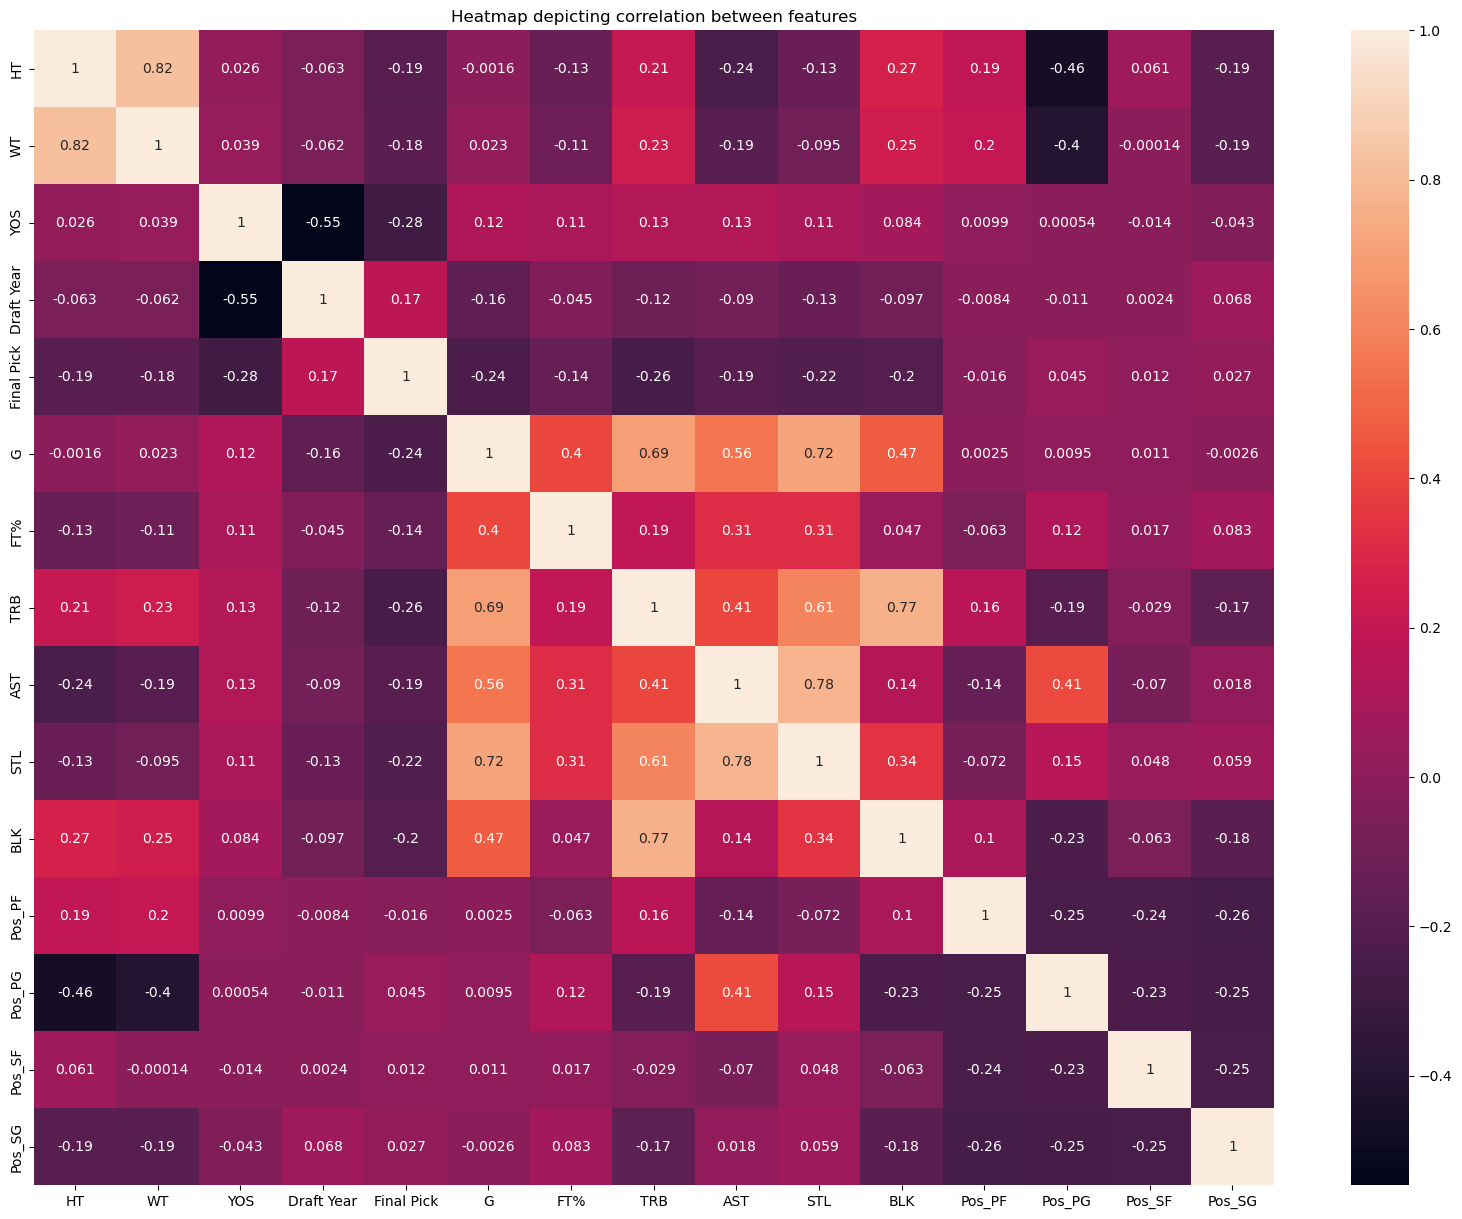

In [8]:
plt.figure( figsize = (20,15) )
sn.heatmap(X_df.corr(), annot = True);
plt.title("Heatmap depicting correlation between features");

In [9]:
X_df = X_df.drop(['STL','TRB', 'WT'], axis=1)
#mention why we also dropped WT

In [10]:
X = sm.add_constant(X_df)

In [11]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split( X, Y, test_size = 0.2, random_state = 5)

In [12]:
train_X.columns

Index(['const', 'HT', 'YOS', 'Draft Year', 'Final Pick', 'G', 'FT%', 'AST',
       'BLK', 'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG'],
      dtype='object')

In [13]:
p3_model = sm.OLS(train_Y, train_X).fit()

In [14]:
p3_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS              Adj. R-squared:     0.501     
Dependent Variable:  3P               AIC:                87788.7511
Date:                2023-01-11 01:48 BIC:                87880.8074
No. Observations:    8789             Log-Likelihood:     -43881.   
Df Model:            12               F-statistic:        736.8     
Df Residuals:        8776             Prob (F-statistic): 0.00      
R-squared:           0.502            Scale:              1273.0    
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
const      -3067.7392 116.0490 -26.4349 0.0000 -3295.2224 -2840.2560
HT             7.1050   5.2781   1.3461 0.1783    -3.2412    17.4513
YOS            1.9468   0.1152  16.8951 0.0000     1.7209     2.1727
Draft Year     1.5005   0.0572  26.2521 0.0000     1.3884     1.6125
Final Pick    -0.0378   0.0157  -2.4038 0.0162    -0.0686    -0.0070
G              0.6431   0.0226  28.5080 0.0000     0.5989     0.6873
FT%           21.0284   2.1510   9.7759 0.0000    16.8119    25.2450
AST            0.1399   0.0041  34.0837 0.0000     0.1318     0.1479
BLK           -0.2079   0.0155 -13.4447 0.0000    -0.2382    -0.1776
Pos_PF        11.4819   1.2437   9.2324 0.0000     9.0441    13.9198
Pos_PG         9.0126   1.7296   5.2108 0.0000     5.6222    12.4030
Pos_SF        27.4013   1.3497  20.3019 0.0000    24.7556    30.0470
Pos_SG        33.5604   1.4449  23.2264 0.0000    30.7280    36.3928
--------------------------------------------------------------------
Omnibus:             1875.265       Durbin-Watson:          2.032   
Prob(Omnibus):       0.000          Jarque-Bera (JB):       5962.501
Skew:                1.084          Prob(JB):               0.000   
Kurtosis:            6.404          Condition No.:          612847  
====================================================================
* The condition number is large (6e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [15]:
train_X2= train_X.drop('HT', axis = 1)
p3_model_2 = sm.OLS(train_Y, train_X2).fit()
p3_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS              Adj. R-squared:     0.501     
Dependent Variable:  3P               AIC:                87788.5657
Date:                2023-01-11 01:48 BIC:                87873.5407
No. Observations:    8789             Log-Likelihood:     -43882.   
Df Model:            11               F-statistic:        803.5     
Df Residuals:        8777             Prob (F-statistic): 0.00      
R-squared:           0.502            Scale:              1273.1    
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
const      -3044.7820 114.7943 -26.5238 0.0000 -3269.8058 -2819.7581
YOS            1.9372   0.1150  16.8433 0.0000     1.7118     2.1627
Draft Year     1.4965   0.0571  26.2163 0.0000     1.3846     1.6084
Final Pick    -0.0418   0.0154  -2.7056 0.0068    -0.0720    -0.0115
G              0.6421   0.0225  28.4781 0.0000     0.5979     0.6863
FT%           20.9523   2.1504   9.7434 0.0000    16.7370    25.1675
AST            0.1398   0.0041  34.0675 0.0000     0.1317     0.1478
BLK           -0.2074   0.0155 -13.4137 0.0000    -0.2377    -0.1771
Pos_PF        11.2352   1.2301   9.1334 0.0000     8.8238    13.6465
Pos_PG         7.9558   1.5412   5.1620 0.0000     4.9346    10.9770
Pos_SF        27.0152   1.3189  20.4828 0.0000    24.4298    29.6006
Pos_SG        32.8680   1.3503  24.3405 0.0000    30.2210    35.5150
--------------------------------------------------------------------
Omnibus:             1878.472       Durbin-Watson:          2.033   
Prob(Omnibus):       0.000          Jarque-Bera (JB):       5960.614
Skew:                1.086          Prob(JB):               0.000   
Kurtosis:            6.400          Condition No.:          606179  
====================================================================
* The condition number is large (6e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [16]:
significant_Features=['YOS','Draft Year','Final Pick','G','FT%','AST','BLK','Pos_PF','Pos_PG','Pos_SF','Pos_SG']

In [17]:
test_X = sm.add_constant(test_X[significant_Features])

In [18]:
pred_y = p3_model_2.predict(test_X)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

np.abs(r2_score(test_Y, pred_y))

0.49886230668348486

In [20]:
np.sqrt(mean_squared_error(test_Y, pred_y))

34.49360304400707

In [21]:
p3_model.params

const        -3067.739172
HT               7.105032
YOS              1.946779
Draft Year       1.500460
Final Pick      -0.037769
G                0.643086
FT%             21.028414
AST              0.139856
BLK             -0.207915
Pos_PF          11.481943
Pos_PG           9.012602
Pos_SF          27.401321
Pos_SG          33.560419
dtype: float64